In [1]:
using DifferentialEquations, Plots

## Exercise 1

In [2]:
#Initial Conditions
A = 1.0
ϵ = 0.1

u0 = [0.0]
du0 = [A]
tspan = (0.0, 20.0)
p = (ϵ)

function weak_nl(ddu, du, u, p, t)
    ϵ = p[1]
    ddu .= -(u + ϵ*u .^ 5)
end

prob = SecondOrderODEProblem(weak_nl, du0, u0, tspan,  p)
sol = solve(prob, Tsit5())

Exer1_plot = plot(sol, vars = [2],
            label = "DifferentialEquations.jl",
            linewidth = 1.5,
            title = "Exercise (1d)");

In [3]:
## Regular Perturbation Expansion
function exer_1_perturb(t, ϵ, A) 
    u0 = A*sin(t)
    u1 = (A^5 / 384) * (-80*sin(t) - 15*sin(3*t) + sin(5*t) + 120*t*cos(t))
    return u0 + ϵ*u1
end

Exer1_plot = plot!(t -> exer_1_perturb(t, ϵ, A), 0, 20,
            label = "Regular Peturbation Expansion",
            linewidth = 1.5,
            linestyle = :dash,
            color = "green");

In [4]:
## Poincare-Lindstedt
function exer_1_PL(t, ϵ, A) 
    ω1 = - 120/384 * A^4
    ω = 1 + ϵ*ω1
    τ = t/ω
    u0 = A*sin(τ)
    u1 = (A^5 / 384) * (-80*sin(τ) - 15*sin(3*τ) + sin(5*τ))
    u1 += A*ω1*(- sin(τ))
    return u0 + ϵ*u1
end

Exer1_plot = plot!(t -> exer_1_PL(t, ϵ, A), 0, 20,
            label = "PL Expansion",
            linewidth = 2.0,
            linestyle = :dashdot,
            color = "red");

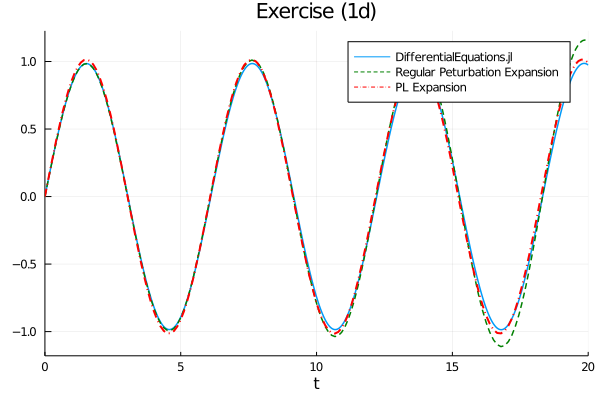

In [5]:
Exer1_plot

## Exercise 2

In [6]:
#Initial Conditions
A = 2.0
ϵ = 0.01

u0 = [0.0]
du0 = [A]
tspan = (0.0, 40.0)
p = (ϵ)

function rayleigh(ddu, du, u, p, t)
    ϵ = p[1]
    ddu .= -u + ϵ*du - (1/3)*ϵ*du .^3
end

prob = SecondOrderODEProblem(rayleigh, du0, u0, tspan,  p)
sol = solve(prob, Tsit5())

Exer2_plot = plot(sol, vars = [2],
            label = "DifferentialEquations.jl",
            linewidth = 1.5,
            title = "Comparing solutions: ϵ = 0.01");

In [7]:
## Poincare-Lindstedt
function exer_2_MS(t, ϵ, A) 
    τ = ϵ*t
    Aτ = 2 * A / sqrt(A^2 + (4 - A^2)*exp(-τ))
    u0 = Aτ*sin(t)
    return u0
end

Exer2_plot = plot!(t -> exer_2_MS(t, ϵ, A), 0, 40,
            label = "Multiscale Expansion",
            linewidth = 2.0,
            linestyle = :dash,
            color = "green");

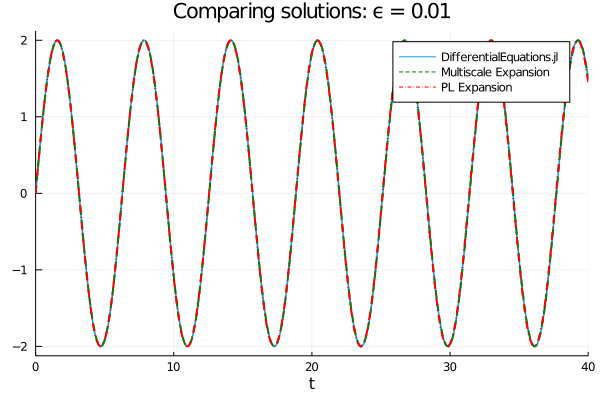

In [8]:
## Poincare-Lindstedt
function exer_2_PL(t, ϵ, A) 
    A0 = 2
    ω2 = - 1/16
    ω = 1 + ϵ*ω2
    τ = t/ω
    u0 = A0*sin(τ)
    u1 = 2/3 * (cos(τ) - 1)*cos(3*τ)
    return u0 + ϵ*u1
end

Exer2_plot = plot!(t -> exer_2_PL(t, ϵ, A), 0, 40,
            label = "PL Expansion",
            linewidth = 2.0,
            linestyle = :dashdot,
            color = "red")

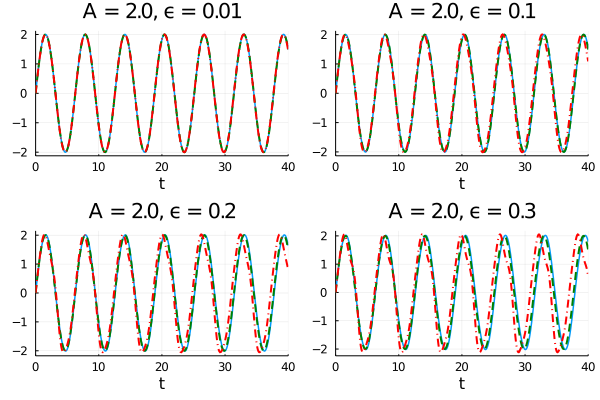

In [9]:
Exer2_plot_vec = []

A = 2.0
u0 = [0.0]
du0 = [A]

for ϵ in [0.01, 0.1, 0.2, 0.3]

    prob = SecondOrderODEProblem(rayleigh, du0, u0, tspan,  [ϵ])
    sol = solve(prob, Tsit5())

    Exer2_plot = plot(sol, vars = [2],
                label = "DifferentialEquations.jl",
                linewidth = 1.5,
                legend = :none,
                title = "A = $A, ϵ = $ϵ")
    
    Exer2_plot = plot!(t -> exer_2_MS(t, ϵ, A), 0, 40,
                label = "Multiscale Expansion",
                linewidth = 2.0,
                linestyle = :dash,
                color = "green");

    Exer2_plot = plot!(t -> exer_2_PL(t, ϵ, A), 0, 40,
                label = "PL Expansion",
                linewidth = 2.0,
                linestyle = :dashdot,
                color = "red");
    push!(Exer2_plot_vec, Exer2_plot)
end

plot(Exer2_plot_vec..., layout = 4)

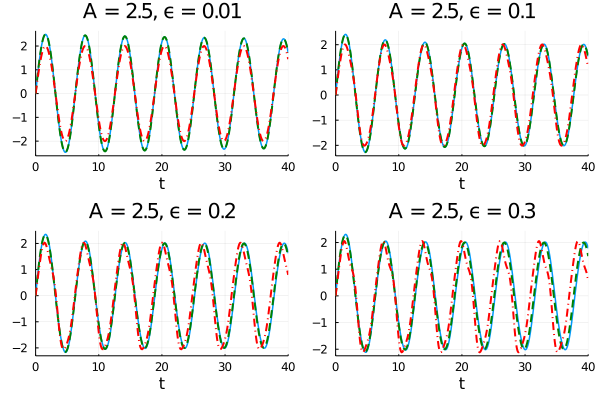

In [10]:
Exer2_plot_vec = []

A = 2.5
u0 = [0.0]
du0 = [A]

for ϵ in [0.01, 0.1, 0.2, 0.3]

    prob = SecondOrderODEProblem(rayleigh, du0, u0, tspan,  [ϵ])
    sol = solve(prob, Tsit5())

    Exer2_plot = plot(sol, vars = [2],
                label = "DifferentialEquations.jl",
                linewidth = 1.5,
                legend = :none,
                title = "A = $A, ϵ = $ϵ")
    
    Exer2_plot = plot!(t -> exer_2_MS(t, ϵ, A), 0, 40,
                label = "Multiscale Expansion",
                linewidth = 2.0,
                linestyle = :dash,
                color = "green");

    Exer2_plot = plot!(t -> exer_2_PL(t, ϵ, A), 0, 40,
                label = "PL Expansion",
                linewidth = 2.0,
                linestyle = :dashdot,
                color = "red");
    push!(Exer2_plot_vec, Exer2_plot)
end

plot(Exer2_plot_vec..., layout = 4)

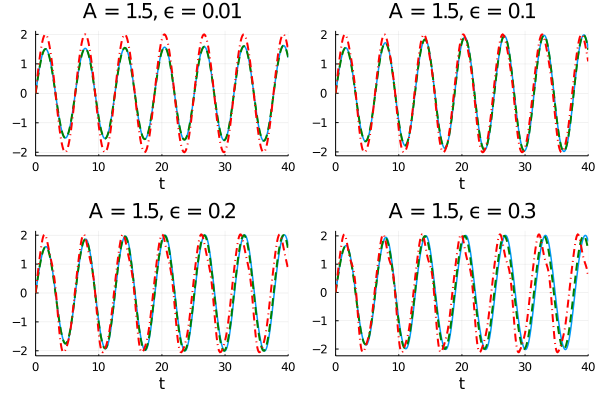

In [11]:
Exer2_plot_vec = []

A = 1.5
u0 = [0.0]
du0 = [A]

for ϵ in [0.01, 0.1, 0.2, 0.3]

    prob = SecondOrderODEProblem(rayleigh, du0, u0, tspan,  [ϵ])
    sol = solve(prob, Tsit5())

    Exer2_plot = plot(sol, vars = [2],
                label = "DifferentialEquations.jl",
                linewidth = 1.5,
                legend = :none,
                title = "A = $A, ϵ = $ϵ")
    
    Exer2_plot = plot!(t -> exer_2_MS(t, ϵ, A), 0, 40,
                label = "Multiscale Expansion",
                linewidth = 2.0,
                linestyle = :dash,
                color = "green");

    Exer2_plot = plot!(t -> exer_2_PL(t, ϵ, A), 0, 40,
                label = "PL Expansion",
                linewidth = 2.0,
                linestyle = :dashdot,
                color = "red");
    push!(Exer2_plot_vec, Exer2_plot)
end

plot(Exer2_plot_vec..., layout = 4)

In [12]:
## Plotting Error 

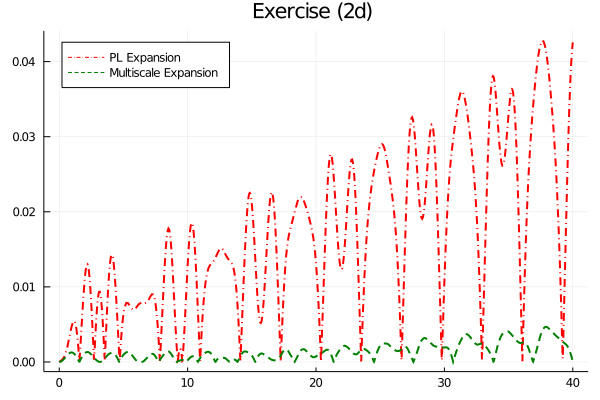

In [13]:
#Initial Conditions
A = 2.0
ϵ = 0.01

u0 = [0.0]
du0 = [A]
tspan = (0.0, 40.0)
p = (ϵ)

prob = SecondOrderODEProblem(rayleigh, du0, u0, tspan,  p)
sol = solve(prob, Tsit5())

error_PL(t) = abs(exer_2_PL(t, ϵ, A) .- sol(t)[2])
Exer2_error_plot = plot(t -> error_PL(t), 0, 40,
            label = "PL Expansion",
            linewidth = 2.0,
            linestyle = :dashdot,
            color = "red",
            title = "Exercise (2d) ")

error_MS(t) = abs(exer_2_MS(t, ϵ, A) .- sol(t)[2])
Exer2_error_plot = plot!(t -> error_MS(t), 0, 40,
            label = "Multiscale Expansion",
            linewidth = 2.0,
            linestyle = :dash,
            legend = :topleft,
            color = "green")

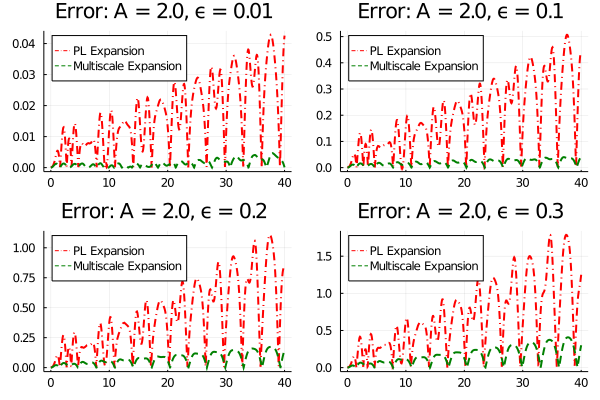

In [14]:
Exer2_error_plot_vec = []

A = 2.0
u0 = [0.0]
du0 = [A]

for ϵ in [0.01, 0.1, 0.2, 0.3]

    prob = SecondOrderODEProblem(rayleigh, du0, u0, tspan,  [ϵ])
    sol = solve(prob, Tsit5())

    error_PL(t) = abs(exer_2_PL(t, ϵ, A) .- sol(t)[2])
    Exer2_error_plot = plot(t -> error_PL(t), 0, 40,
                label = "PL Expansion",
                linewidth = 2.0,
                linestyle = :dashdot,
                color = "red",
                title = "Error: A = $A, ϵ = $ϵ ")

    error_MS(t) = abs(exer_2_MS(t, ϵ, A) .- sol(t)[2])
    Exer2_error_plot = plot!(t -> error_MS(t), 0, 40,
                label = "Multiscale Expansion",
                linewidth = 2.0,
                linestyle = :dash,
                legend = :topleft,
                color = "green")
    
    push!(Exer2_error_plot_vec, Exer2_error_plot)
end
plot(Exer2_error_plot_vec..., layout = 4)